# Feature importance based on Minimum Redundancy Maximum Relevance (MRMR) and Extra Tree (ET) criteria

This file will identify the most important 20 features (i.e. questions) in the DASS-42 (Depression Anxiety and Stress Scale-42). 

Feature selection is done to select the questions that were best to predict whether participants’ final anxiety scores were at the low or high class.

# 1. Feature selection based on Minimum Redundancy Maximum Relevance (MRMR) criteria
Firstly, import the necessary libraries and define constants.

In [1]:
import os
import pymrmr
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data_folder = "./data"
show_top = 20

In [2]:
# One-hot encoded dataset
train_feats = pd.read_csv(os.path.join(data_folder, "features.csv"))
train_feats = train_feats.drop(["age_norm", "gender_m", "gender_f", "region_other", "region_east", "region_west"], axis=1)  # Comment this line to include demographics

print("Processed dataset:")
print(pymrmr.mRMR(train_feats, 'MIQ', show_top))

Processed dataset:
['Q11A_0', 'Q2A_1', 'Q1A_1', 'Q15A_1', 'Q12A_2', 'Q25A_0', 'Q6A_0', 'Q35A_0', 'Q11A_2', 'Q29A_3', 'Q24A_2', 'Q39A_2', 'Q21A_1', 'Q30A_0', 'Q27A_0', 'Q13A_0', 'Q1A_2', 'Q14A_3', 'Q18A_0', 'Q29A_0']


Using the not one-hot encoded dataset, print the minimum number (20) of useful features using mRMR.

In [3]:
# Not one-hot encoded dataset
train_feats = pd.read_csv(os.path.join(data_folder, "data_filtered_1000.csv")) # Using sample dataset. Change the file name accordingly if using another dataset.

label_encoder = LabelEncoder()
region = label_encoder.fit_transform(train_feats["region"])
region = pd.DataFrame(region)
region.columns = ["region1"]
train_feats = pd.concat([train_feats, region], axis=1)

train_feats = train_feats.drop(["anxiety_score", "anxiety_status", "country", "agegroup", "continent", "region"], axis=1)
train_feats = train_feats.drop(["gender", "age", "region1"], axis=1)  # Comment this line to include demographics

print("\nUnprocessed dataset:")
print(pymrmr.mRMR(train_feats, 'MIQ', show_top))


Unprocessed dataset:
['Q11A', 'Q42A', 'Q41A', 'Q6A', 'Q32A', 'Q18A', 'Q29A', 'Q39A', 'Q16A', 'Q27A', 'Q35A', 'Q20A', 'Q40A', 'Q13A', 'Q14A', 'Q22A', 'Q8A', 'Q30A', 'Q26A', 'Q36A']


# 2. Feature selection based on the Gini importance of features in an Extra Tree (ET) classifier

This section will use an Extra-Tree Classifier to identify the most important 20 features (i.e., questions) by extracting the Gini importance of each feature from an Extra-Tree Classifier.

Firstly, import the necessary libraries and define the variables used.

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

data_folder = "./data"
show_top = 20

Using the one-hot encoded dataset, fit an Extra-Tree Classifier model and plot a graph of the top 20 features by Gini importance.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5060\3375675129.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(features, labels)


Q41A_0    0.074273
Q7A_0     0.054609
Q20A_0    0.049992
Q28A_0    0.049754
Q19A_0    0.040619
Q4A_0     0.036211
Q9A_3     0.030392
Q40A_3    0.026211
Q25A_0    0.025100
Q36A_0    0.019752
Q30A_0    0.018616
Q25A_3    0.016150
Q15A_0    0.014788
Q20A_3    0.013867
Q12A_0    0.013652
Q36A_3    0.013578
Q33A_0    0.013436
Q9A_0     0.013141
Q40A_1    0.012418
Q33A_2    0.011443
dtype: float64


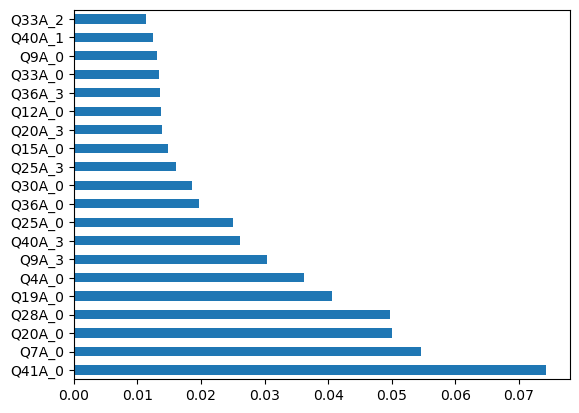

In [5]:
# One-hot encoded dataset
features = pd.read_csv(os.path.join(data_folder, "features.csv"))
labels = pd.read_csv(os.path.join(data_folder, "labels.csv"))

# First fit a model for questions plus demographics
features = features.drop(["gender_m", "gender_f", "region_other", "region_east", "region_west", "age_norm"], axis=1)  # Comment this line to include demographics

model = ExtraTreesClassifier()
model.fit(features, labels)
# print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers (Gini importance)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(show_top).plot(kind='barh')
print(feat_importances.nlargest(show_top))
plt.show()

Using the not one-hot encoded dataset, fit an Extra-Tree Classifier model and plot a graph of the top 20 features by Gini importance.

Q28A    0.076932
Q25A    0.070192
Q20A    0.068912
Q7A     0.067856
Q36A    0.067702
Q41A    0.065193
Q40A    0.058252
Q9A     0.052438
Q4A     0.036992
Q19A    0.035852
Q33A    0.031837
Q30A    0.030587
Q29A    0.024033
Q15A    0.022919
Q23A    0.022298
Q12A    0.020844
Q1A     0.018589
Q2A     0.018267
Q11A    0.016698
Q39A    0.016565
dtype: float64


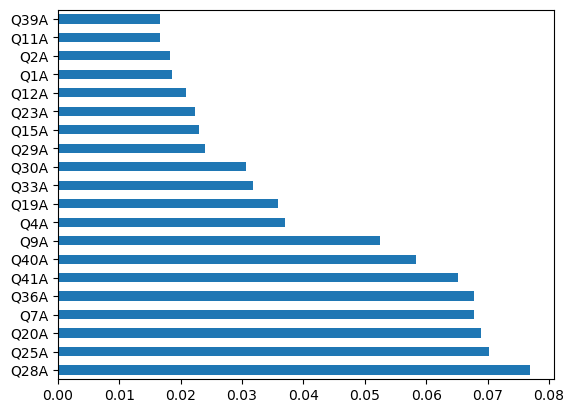

In [6]:
# Not one-hot encoded dataset
df = pd.read_csv(os.path.join(data_folder, "data_filtered_1000.csv")) # Using sample dataset.
features = df
labels = df["anxiety_status"]

label_encoder = LabelEncoder()
region = label_encoder.fit_transform(features["region"])
region = pd.DataFrame(region)
region.columns = ["region1"]
features = pd.concat([features, region], axis=1)

# First fit a model for questions plus demographics
features = features.drop(["anxiety_score", "anxiety_status", "country", "agegroup", "continent", "region"], axis=1)
features = features.drop(["gender", "age", "region1"], axis=1)  # Comment this line to include demographics

model = ExtraTreesClassifier()
model.fit(features, labels)
# print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers (Gini importance)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(show_top).plot(kind='barh')
print(feat_importances.nlargest(show_top))
plt.show()